In [ ]:
import pandas as pd
import imblearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("encode2_off.csv")
data.head()

,Unnamed: 0,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,0,76.54,0.758783,19,0,0
1,1,76.54,0.490986,13,0,1
2,2,76.54,0.428038,14,0,1
3,3,76.54,0.345700,19,0,0
4,4,76.54,0.143454,14,0,1


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,76.54,0.758783,19,0,0
1,76.54,0.490986,13,0,1
2,76.54,0.428038,14,0,1
3,76.54,0.345700,19,0,0
4,76.54,0.143454,14,0,1


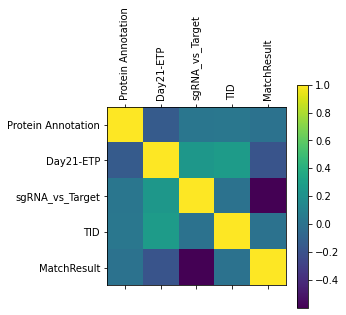

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(5), data.columns, rotation=90)
plt.yticks(np.arange(5), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
count = 0
test = pd.DataFrame()
train = pd.DataFrame()
for index, row in data.iterrows():
    count += 1
    if (count%3)==0:
        test = test.append(row)
    else:
        train = train.append(row)

In [ ]:
train1 = train
test1 = test

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27043 entries, 0 to 40563
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day21-ETP           27043 non-null  float64
 1   MatchResult         27043 non-null  float64
 2   Protein Annotation  27043 non-null  float64
 3   TID                 27043 non-null  float64
 4   sgRNA_vs_Target     27043 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13521 entries, 2 to 40562
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day21-ETP           13521 non-null  float64
 1   MatchResult         13521 non-null  float64
 2   Protein Annotation  13521 non-null  float64
 3   TID                 13521 non-null  float64
 4   sgRNA_vs_Target     13521 non-null  float64
dtypes: float64(5)
memory usage: 633.8 KB


In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
test1.MatchResult.value_counts()

1.0    8754
0.0    4767
Name: MatchResult, dtype: int64

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

Score:  0.349618142446702
Weights:  [-0.010756    0.00017642  0.01177501 -0.0616556 ]


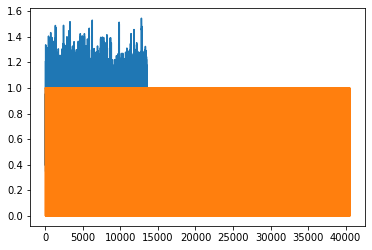

In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# **SVM (KERNEL: GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_gaussian))
print(classification_report(y_test,y_pred_m1_svm_gaussian))

[[4764    3]
 [ 532 8222]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.96      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4764             |        3               |   4767   |
|  Match (1)      |      532             |        8222              |   8754  |
|        TOTAL              |      5296             |        8225             |   13521  |

In [ ]:
m1_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m1_svm_gaussian)

In [ ]:
M1_sp_SVM_gaussian=0.90
M1_se_SVM_gaussian=1.00
M1_acc_SVM_gaussian=0.96

In [ ]:
results = pd.DataFrame({'Classifier' : pd.Categorical(["SVM - Gaussian"]),
                        'Model' : pd.Categorical(["Imbalanced - Match"]),
                        'Specificity' : M1_sp_SVM_gaussian,
                        'Sensitivity' : M1_se_SVM_gaussian,
                        'Accuracy' : M1_acc_SVM_gaussian,
                        'AUC' : m1_svm_gaussian_auc})

**Model 2 - Manually Balanced**

In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
negative_cases = train1[train1['MatchResult'] == 0]
positive_cases = train1[train1['MatchResult'] == 1].sample(9857, random_state=0)
train1_balanced = pd.concat([positive_cases,negative_cases])
train1_balanced.sort_index(inplace=True)

X_train_bal = train1_balanced.drop(['MatchResult'], axis=1)
y_train_bal = train1_balanced['MatchResult']

train1_balanced.MatchResult.value_counts()

1.0    9857
0.0    9857
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_gaussian))
print(classification_report(y_test,y_pred_m2_svm_gaussian))

[[4766    1]
 [ 573 8181]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4767
         1.0       1.00      0.93      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.95     13521
weighted avg       0.96      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4766             |        1               |   4767   |
|  Match (1)      |      573             |        8181              |   8754  |
|        TOTAL              |           5339        |        8182             |   13521  |

In [ ]:
m2_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m2_svm_gaussian)

In [ ]:
M2_sp_SVM_gaussian=0.89
M2_se_SVM_gaussian=1.00
M2_acc_SVM_gaussian=0.96

In [ ]:
svm_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Gaussian", 'Specificity':M2_sp_SVM_gaussian, 'Sensitivity':M2_se_SVM_gaussian, 'Accuracy':M2_acc_SVM_gaussian, 'AUC': m2_svm_gaussian_auc}
results = results.append(svm_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_gaussian))
print(classification_report(y_test,y_pred_m3_svm_gaussian))

[[4766    1]
 [ 533 8221]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.96      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4766             |        1               |   4767   |
|  Match (1)      |      533             |        8221              |   8754  |
|        TOTAL              |      5299             |        8222             |   13521  |

In [ ]:
m3_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m3_svm_gaussian)

In [ ]:
M3_sp_SVM_gaussian=0.90
M3_se_SVM_gaussian=1.00
M3_acc_SVM_gaussian=0.96

In [ ]:
svm_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Gaussian", 'Specificity':M3_sp_SVM_gaussian, 'Sensitivity':M3_se_SVM_gaussian, 'Accuracy':M3_acc_SVM_gaussian, 'AUC': m3_svm_gaussian_auc}
results = results.append(svm_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
train1.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
positive_cases = train1[train1['MatchResult'] == 1].sample(3285, random_state=0)
negative_cases = train1[train1['MatchResult'] == 0].sample(6572, random_state=0)
train1_imbalanced = pd.concat([positive_cases,negative_cases])
train1_imbalanced.sort_index(inplace=True)

X_train_imbal = train1_imbalanced.drop(['MatchResult'], axis=1)
y_train_imbal = train1_imbalanced['MatchResult']
# AFTER
train1_imbalanced.MatchResult.value_counts()

0.0    6572
1.0    3285
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_gaussian))
print(classification_report(y_test,y_pred_m4_svm_gaussian))

[[4767    0]
 [ 988 7766]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4767
         1.0       1.00      0.89      0.94      8754

    accuracy                           0.93     13521
   macro avg       0.91      0.94      0.92     13521
weighted avg       0.94      0.93      0.93     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      988             |        7766              |   8754  |
|        TOTAL              |      5755             |        7766             |   13521  |

In [ ]:
m4_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m4_svm_gaussian)

In [ ]:
M4_sp_SVM_gaussian=0.83
M4_se_SVM_gaussian=1.00
M4_acc_SVM_gaussian=0.93

In [ ]:
svm_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Gaussian", 'Specificity':M4_sp_SVM_gaussian, 'Sensitivity':M4_se_SVM_gaussian, 'Accuracy':M4_acc_SVM_gaussian, 'AUC': m4_svm_gaussian_auc}
results = results.append(svm_gaussian_m4, ignore_index=True)

# **SVM (KERNEL: POLYNOMIAL)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_polynomial))
print(classification_report(y_test,y_pred_m1_svm_polynomial))

[[4767    0]
 [2075 6679]]
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82      4767
         1.0       1.00      0.76      0.87      8754

    accuracy                           0.85     13521
   macro avg       0.85      0.88      0.84     13521
weighted avg       0.89      0.85      0.85     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      2075             |        6679              |   8754  |
|        TOTAL              |      6842             |        6679             |   13521  |

In [ ]:
m1_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m1_svm_polynomial)

In [ ]:
M1_sp_SVM_polynomial=0.70
M1_se_SVM_polynomial=1.00
M1_acc_SVM_polynomial=0.85

In [ ]:
svm_polynomial_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Polynomial", 'Specificity':M1_sp_SVM_polynomial, 'Sensitivity':M1_se_SVM_polynomial, 'Accuracy':M1_acc_SVM_polynomial, 'AUC': m1_svm_polynomial_auc}
results = results.append(svm_polynomial_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_polynomial))
print(classification_report(y_test,y_pred_m2_svm_polynomial))

[[4767    0]
 [2666 6088]]
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      4767
         1.0       1.00      0.70      0.82      8754

    accuracy                           0.80     13521
   macro avg       0.82      0.85      0.80     13521
weighted avg       0.87      0.80      0.81     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      2666             |        6088              |   8754  |
|        TOTAL              |      7433             |        6088             |   13521  |

In [ ]:
m2_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m2_svm_polynomial)

In [ ]:
M2_sp_SVM_polynomial=0.64
M2_se_SVM_polynomial=1.00
M2_acc_SVM_polynomial=0.80

In [ ]:
svm_polynomial_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Polynomial", 'Specificity':M2_sp_SVM_polynomial, 'Sensitivity':M2_se_SVM_polynomial, 'Accuracy':M2_acc_SVM_polynomial, 'AUC': m2_svm_polynomial_auc}
results = results.append(svm_polynomial_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_polynomial))
print(classification_report(y_test,y_pred_m3_svm_polynomial))

[[4767    0]
 [2100 6654]]
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      4767
         1.0       1.00      0.76      0.86      8754

    accuracy                           0.84     13521
   macro avg       0.85      0.88      0.84     13521
weighted avg       0.89      0.84      0.85     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      2100             |        6654              |   8754  |
|        TOTAL              |      6867             |        6654             |   13521  |

In [ ]:
m3_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m3_svm_polynomial)

In [ ]:
M3_sp_SVM_polynomial=0.69
M3_se_SVM_polynomial=1.00
M3_acc_SVM_polynomial=0.84

In [ ]:
svm_polynomial_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Polynomial", 'Specificity':M3_sp_SVM_polynomial, 'Sensitivity':M3_se_SVM_polynomial, 'Accuracy':M3_acc_SVM_polynomial, 'AUC': m3_svm_polynomial_auc}
results = results.append(svm_polynomial_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_polynomial))
print(classification_report(y_test,y_pred_m4_svm_polynomial))

[[4767    0]
 [2666 6088]]
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      4767
         1.0       1.00      0.70      0.82      8754

    accuracy                           0.80     13521
   macro avg       0.82      0.85      0.80     13521
weighted avg       0.87      0.80      0.81     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      2666             |        6088              |   8754  |
|        TOTAL              |      7433             |        6088             |   13521  |

In [ ]:
m4_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m4_svm_polynomial)

In [ ]:
M4_sp_SVM_polynomial=0.64
M4_se_SVM_polynomial=1.00
M4_acc_SVM_polynomial=0.80

In [ ]:
svm_polynomial_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Polynomial", 'Specificity':M4_sp_SVM_polynomial, 'Sensitivity':M4_se_SVM_polynomial, 'Accuracy':M4_acc_SVM_polynomial, 'AUC': m4_svm_polynomial_auc}
results = results.append(svm_polynomial_m4, ignore_index=True)

# **SVM (KERNEL: SIGMOID)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_sigmoid))
print(classification_report(y_test,y_pred_m1_svm_sigmoid))

[[1715 3052]
 [3233 5521]]
              precision    recall  f1-score   support

         0.0       0.35      0.36      0.35      4767
         1.0       0.64      0.63      0.64      8754

    accuracy                           0.54     13521
   macro avg       0.50      0.50      0.50     13521
weighted avg       0.54      0.54      0.54     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1715             |        3052               |   4767   |
|  Match (1)      |      3233             |        5521              |   8754  |
|        TOTAL              |      4948             |        8573             |   13521  |

In [ ]:
m1_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m1_svm_sigmoid)

In [ ]:
M1_sp_SVM_sigmoid=0.35
M1_se_SVM_sigmoid=0.36
M1_acc_SVM_sigmoid=0.54

In [ ]:
svm_sigmoid_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Sigmoid", 'Specificity':M1_sp_SVM_sigmoid, 'Sensitivity':M1_se_SVM_sigmoid, 'Accuracy':M1_acc_SVM_sigmoid, 'AUC': m1_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_sigmoid))
print(classification_report(y_test,y_pred_m2_svm_sigmoid))

[[2381 2386]
 [4421 4333]]
              precision    recall  f1-score   support

         0.0       0.35      0.50      0.41      4767
         1.0       0.64      0.49      0.56      8754

    accuracy                           0.50     13521
   macro avg       0.50      0.50      0.49     13521
weighted avg       0.54      0.50      0.51     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      2381             |        2386               |   4767   |
|  Match (1)      |      4421             |        4333              |   8754  |
|        TOTAL              |      6802             |        6719             |   13521  |

In [ ]:
m2_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m2_svm_sigmoid)

In [ ]:
M2_sp_SVM_sigmoid=0.35
M2_se_SVM_sigmoid=0.50
M2_acc_SVM_sigmoid=0.50

In [ ]:
svm_sigmoid_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Sigmoid", 'Specificity':M2_sp_SVM_sigmoid, 'Sensitivity':M2_se_SVM_sigmoid, 'Accuracy':M2_acc_SVM_sigmoid, 'AUC': m2_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_sigmoid))
print(classification_report(y_test,y_pred_m3_svm_sigmoid))

[[2387 2380]
 [4436 4318]]
              precision    recall  f1-score   support

         0.0       0.35      0.50      0.41      4767
         1.0       0.64      0.49      0.56      8754

    accuracy                           0.50     13521
   macro avg       0.50      0.50      0.49     13521
weighted avg       0.54      0.50      0.51     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      2387             |        2380               |   4767   |
|  Match (1)      |      4436             |        4318              |   8754  |
|        TOTAL              |      6823             |        6698             |   13521  |

In [ ]:
m3_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m3_svm_sigmoid)

In [ ]:
M3_sp_SVM_sigmoid=0.35
M3_se_SVM_sigmoid=0.50
M3_acc_SVM_sigmoid=0.50

In [ ]:
svm_sigmoid_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Sigmoid", 'Specificity':M3_sp_SVM_sigmoid, 'Sensitivity':M3_se_SVM_sigmoid, 'Accuracy':M3_acc_SVM_sigmoid, 'AUC': m3_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_sigmoid))
print(classification_report(y_test,y_pred_m4_svm_sigmoid))

[[3143 1624]
 [5820 2934]]
              precision    recall  f1-score   support

         0.0       0.35      0.66      0.46      4767
         1.0       0.64      0.34      0.44      8754

    accuracy                           0.45     13521
   macro avg       0.50      0.50      0.45     13521
weighted avg       0.54      0.45      0.45     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3143             |        1624               |   4767   |
|  Match (1)      |      5820             |        2934              |   8754  |
|        TOTAL              |      6163             |        4558             |   13521  |

In [ ]:
m4_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m4_svm_sigmoid)

In [ ]:
M4_sp_SVM_sigmoid=0.35
M4_se_SVM_sigmoid=0.66
M4_acc_SVM_sigmoid=0.44

In [ ]:
svm_sigmoid_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Sigmoid", 'Specificity':M4_sp_SVM_sigmoid, 'Sensitivity':M4_se_SVM_sigmoid, 'Accuracy':M4_acc_SVM_sigmoid, 'AUC': m4_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m4, ignore_index=True)

# **NAIVE BAYES (GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_gaussian))
print(classification_report(y_test,y_pred_m1_naive_gaussian))

[[4767    0]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5286             |        8235             |   13521  |

In [ ]:
m1_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m1_naive_gaussian)

In [ ]:
M1_sp_naive_gaussian=0.90
M1_se_naive_gaussian=1.00
M1_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M1_sp_naive_gaussian, 'Sensitivity':M1_se_naive_gaussian, 'Accuracy':M1_acc_naive_gaussian, 'AUC': m1_naive_gaussian_auc}
results = results.append(naive_gaussian_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_gaussian))
print(classification_report(y_test,y_pred_m2_naive_gaussian))

[[4767    0]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5286             |        8235             |   13521  |

In [ ]:
m2_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m2_naive_gaussian)

In [ ]:
M2_sp_naive_gaussian=0.90
M2_se_naive_gaussian=1.00
M2_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M2_sp_naive_gaussian, 'Sensitivity':M2_se_naive_gaussian, 'Accuracy':M2_acc_naive_gaussian, 'AUC': m2_naive_gaussian_auc}
results = results.append(naive_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_gaussian))
print(classification_report(y_test,y_pred_m3_naive_gaussian))

[[4767    0]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5286             |        8235             |   13521  |

In [ ]:
m3_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m3_naive_gaussian)

In [ ]:
M3_sp_naive_gaussian=0.90
M3_se_naive_gaussian=1.00
M3_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M3_sp_naive_gaussian, 'Sensitivity':M3_se_naive_gaussian, 'Accuracy':M3_acc_naive_gaussian, 'AUC': m3_naive_gaussian_auc}
results = results.append(naive_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = GaussianNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_gaussian))
print(classification_report(y_test,y_pred_m4_naive_gaussian))

[[4767    0]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5286             |        8235             |   13521  |

In [ ]:
m4_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m4_naive_gaussian)

In [ ]:
M4_sp_naive_gaussian=0.90
M4_se_naive_gaussian=1.00
M4_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M4_sp_naive_gaussian, 'Sensitivity':M4_se_naive_gaussian, 'Accuracy':M4_acc_naive_gaussian, 'AUC': m4_naive_gaussian_auc}
results = results.append(naive_gaussian_m4, ignore_index=True)

# **Naive Bayes (Bernoulli)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_bernoulli))
print(classification_report(y_test,y_pred_m1_naive_bernoulli))

[[1605 3162]
 [1608 7146]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.62      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |       3162              |   3343   |
|  Match (1)      |      1608             |        7146             |   5671  |
|        TOTAL              |      3213             |        10308              |   13521  |

In [ ]:
m1_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m1_naive_bernoulli)

In [ ]:
M1_sp_naive_bernoulli=0.50
M1_se_naive_bernoulli=0.34
M1_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M1_sp_naive_bernoulli, 'Sensitivity':M1_se_naive_bernoulli, 'Accuracy':M1_acc_naive_bernoulli, 'AUC':m1_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_bernoulli))
print(classification_report(y_test,y_pred_m2_naive_bernoulli))

[[1605 3162]
 [1608 7146]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.62      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |       3162              |   3343   |
|  Match (1)      |      1608             |        7146             |   5671  |
|        TOTAL              |      3213             |        10308              |   13521  |

In [ ]:
m2_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m2_naive_bernoulli)

In [ ]:
M2_sp_naive_bernoulli=0.50
M2_se_naive_bernoulli=0.34
M2_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M2_sp_naive_bernoulli, 'Sensitivity':M2_se_naive_bernoulli, 'Accuracy':M2_acc_naive_bernoulli, 'AUC':m2_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_bernoulli))
print(classification_report(y_test,y_pred_m3_naive_bernoulli))

[[1605 3162]
 [1608 7146]]
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.40      4767
         1.0       0.69      0.82      0.75      8754

    accuracy                           0.65     13521
   macro avg       0.60      0.58      0.58     13521
weighted avg       0.62      0.65      0.63     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1605             |       3162              |   3343   |
|  Match (1)      |      1608             |        7146             |   5671  |
|        TOTAL              |      3213             |        10308              |   13521  |

In [ ]:
m3_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m3_naive_bernoulli)

In [ ]:
M3_sp_naive_bernoulli=0.50
M3_se_naive_bernoulli=0.34
M3_acc_naive_bernoulli=0.65

In [ ]:
naive_bernoullii_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M3_sp_naive_bernoulli, 'Sensitivity':M3_se_naive_bernoulli, 'Accuracy':M3_acc_naive_bernoulli, 'AUC':m3_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = BernoulliNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_bernoulli))
print(classification_report(y_test,y_pred_m4_naive_bernoulli))

[[4767    0]
 [8754    0]]
              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52      4767
         1.0       0.00      0.00      0.00      8754

    accuracy                           0.35     13521
   macro avg       0.18      0.50      0.26     13521
weighted avg       0.12      0.35      0.18     13521



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0              |   4767   |
|  Match (1)      |      8754             |        0             |   8754  |
|        TOTAL              |      13521             |        0              |   13521  |

In [ ]:
m4_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m4_naive_bernoulli)

In [ ]:
M4_sp_naive_bernoulli=0.35
M4_se_naive_bernoulli=1.00
M4_acc_naive_bernoulli=0.35

In [ ]:
naive_bernoullii_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M4_sp_naive_bernoulli, 'Sensitivity':M4_se_naive_bernoulli, 'Accuracy':M4_acc_naive_bernoulli, 'AUC':m4_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m4, ignore_index=True)

# **Random Forest**



**Model 1 - Imbalanced towards Match**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m1_rf))
print(classification_report(y_test,y_pred_m1_rf))

[[4373  394]
 [ 421 8333]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      4767
         1.0       0.95      0.95      0.95      8754

    accuracy                           0.94     13521
   macro avg       0.93      0.93      0.93     13521
weighted avg       0.94      0.94      0.94     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4375             |        392               |   4767   |
|  Match (1)      |      426             |        8328              |   8754  |
|        TOTAL              |      4801             |        8720             |   13521  |

In [ ]:
m1_rf_auc = roc_auc_score(y_test, y_pred_m1_rf)

In [ ]:
M1_sp_rf=0.91
M1_se_rf=0.92
M1_acc_rf=0.94

In [ ]:
rf_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Random Forest", 'Specificity':M1_sp_rf, 'Sensitivity':M1_se_rf, 'Accuracy':M1_acc_rf, 'AUC':m1_rf_auc}
results = results.append(rf_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m2_rf))
print(classification_report(y_test,y_pred_m2_rf))

[[4525  242]
 [ 478 8276]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      4767
         1.0       0.97      0.95      0.96      8754

    accuracy                           0.95     13521
   macro avg       0.94      0.95      0.94     13521
weighted avg       0.95      0.95      0.95     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4530             |        237               |   4767   |
|  Match (1)      |      479             |        8275              |   8754  |
|        TOTAL              |      5009             |        8512             |   13521  |

In [ ]:
m2_rf_auc = roc_auc_score(y_test, y_pred_m2_rf)

In [ ]:
M2_sp_rf=0.90
M2_se_rf=0.95
M2_acc_rf=0.95

In [ ]:
rf_m2 = {'Model':"Balanced - Manual", 'Classifier':"Random Forest", 'Specificity':M2_sp_rf, 'Sensitivity':M2_se_rf, 'Accuracy':M2_acc_rf, 'AUC':m2_rf_auc}
results = results.append(rf_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m3_rf))
print(classification_report(y_test,y_pred_m3_rf))

[[4392  375]
 [ 427 8327]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      4767
         1.0       0.96      0.95      0.95      8754

    accuracy                           0.94     13521
   macro avg       0.93      0.94      0.94     13521
weighted avg       0.94      0.94      0.94     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4391             |        376               |   4767   |
|  Match (1)      |      423             |        8331              |   8754  |
|        TOTAL              |      4814             |        8707             |   13521  |

In [ ]:
m3_rf_auc = roc_auc_score(y_test, y_pred_m3_rf)

In [ ]:
M3_sp_rf=0.91
M3_se_rf=0.92
M3_acc_rf=0.94

In [ ]:
rf_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Random Forest", 'Specificity':M3_sp_rf, 'Sensitivity':M3_se_rf, 'Accuracy':M3_acc_rf, 'AUC':m3_rf_auc}
results = results.append(rf_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
rf = RandomForestClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m4_rf))
print(classification_report(y_test,y_pred_m4_rf))

[[4680   87]
 [ 483 8271]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      4767
         1.0       0.99      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.96      0.95     13521
weighted avg       0.96      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4680             |        87               |   4767   |
|  Match (1)      |      485             |        8269              |   8754  |
|        TOTAL              |      5165             |        8356             |   13521  |

In [ ]:
m4_rf_auc = roc_auc_score(y_test, y_pred_m4_rf)

In [ ]:
M4_sp_rf=0.91
M4_se_rf=0.98
M4_acc_rf=0.96

In [ ]:
rf_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Random Forest", 'Specificity':M4_sp_rf, 'Sensitivity':M4_se_rf, 'Accuracy':M4_acc_rf, 'AUC':m4_rf_auc}
results = results.append(rf_m4, ignore_index=True)

# **LightGBM**

**Model 1 - Imbalanced towards Match**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_lgb))
print(classification_report(y_test,y_pred_m1_lgb))

[[4762    5]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.96      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4762             |        5               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5281             |        8240             |   13521  |

In [ ]:
m1_lgb_auc = roc_auc_score(y_test, y_pred_m1_lgb)

In [ ]:
M1_sp_lgb=0.90
M1_se_lgb=1.00
M1_acc_lgb=0.96

In [ ]:
lgb_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Light GBM", 'Specificity':M1_sp_lgb, 'Sensitivity':M1_se_lgb, 'Accuracy':M1_acc_lgb, 'AUC':m1_lgb_auc}
results = results.append(lgb_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_lgb))
print(classification_report(y_test,y_pred_m2_lgb))

[[4765    2]
 [ 518 8236]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4765             |        2               |   4767   |
|  Match (1)      |      518             |        8236              |   8754  |
|        TOTAL              |      5283             |        8238             |   13521  |

In [ ]:
m2_lgb_auc = roc_auc_score(y_test, y_pred_m2_lgb)

In [ ]:
M2_sp_lgb=0.90
M2_se_lgb=1.00
M2_acc_lgb=0.96

In [ ]:
lgb_m2 = {'Model':"Balanced - Manual", 'Classifier':"Light GBM", 'Specificity':M2_sp_lgb, 'Sensitivity':M2_se_lgb, 'Accuracy':M2_acc_lgb, 'AUC':m2_lgb_auc}
results = results.append(lgb_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_lgb))
print(classification_report(y_test,y_pred_m3_lgb))

[[4767    0]
 [ 519 8235]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4767             |        0               |   4767   |
|  Match (1)      |      519             |        8235              |   8754  |
|        TOTAL              |      5286             |        8235             |   13521  |

In [ ]:
m3_lgb_auc = roc_auc_score(y_test, y_pred_m3_lgb)

In [ ]:
M3_sp_lgb=0.90
M3_se_lgb=1.00
M3_acc_lgb=0.96

In [ ]:
lgb_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Light GBM", 'Specificity':M3_sp_lgb, 'Sensitivity':M3_se_lgb, 'Accuracy':M3_acc_lgb, 'AUC':m3_lgb_auc}
results = results.append(lgb_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_lgb))
print(classification_report(y_test,y_pred_m4_lgb))

[[4762    5]
 [ 517 8237]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      4767
         1.0       1.00      0.94      0.97      8754

    accuracy                           0.96     13521
   macro avg       0.95      0.97      0.96     13521
weighted avg       0.97      0.96      0.96     13521



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      4762             |        5               |   4767   |
|  Match (1)      |      517             |        8237              |   8754  |
|        TOTAL              |      5279             |        8242             |   13521  |

In [ ]:
m4_lgb_auc = roc_auc_score(y_test, y_pred_m4_lgb)

In [ ]:
M4_sp_lgb=0.90
M4_se_lgb=1.00
M4_acc_lgb=0.96

In [ ]:
lgb_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Light GBM", 'Specificity':M4_sp_lgb, 'Sensitivity':M4_se_lgb, 'Accuracy':M4_acc_lgb, 'AUC': m4_lgb_auc}
results = results.append(lgb_m4, ignore_index=True)

In [ ]:
#results.drop(results.tail(4).index,inplace=True)

In [ ]:
outfile = 'result2_off.csv'
results.to_csv(outfile)

In [ ]:
results.sort_values('AUC' , ascending=False)

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
14,Naive Bayes - Gaussian,Balanced - SMOTE,0.90,1.00,0.96,0.970356
12,Naive Bayes - Gaussian,Imbalanced - Match,0.90,1.00,0.96,0.970356
26,Light GBM,Balanced - SMOTE,0.90,1.00,0.96,0.970356
15,Naive Bayes - Gaussian,Imbalanced - Mismatch,0.90,1.00,0.96,0.970356
13,Naive Bayes - Gaussian,Balanced - Manual,0.90,1.00,0.96,0.970356
25,Light GBM,Balanced - Manual,0.90,1.00,0.96,0.970204
27,Light GBM,Imbalanced - Mismatch,0.90,1.00,0.96,0.969946
24,Light GBM,Imbalanced - Match,0.90,1.00,0.96,0.969832
2,SVM - Gaussian,Balanced - SMOTE,0.90,1.00,0.96,0.969452
0,SVM - Gaussian,Imbalanced - Match,0.90,1.00,0.96,0.969299


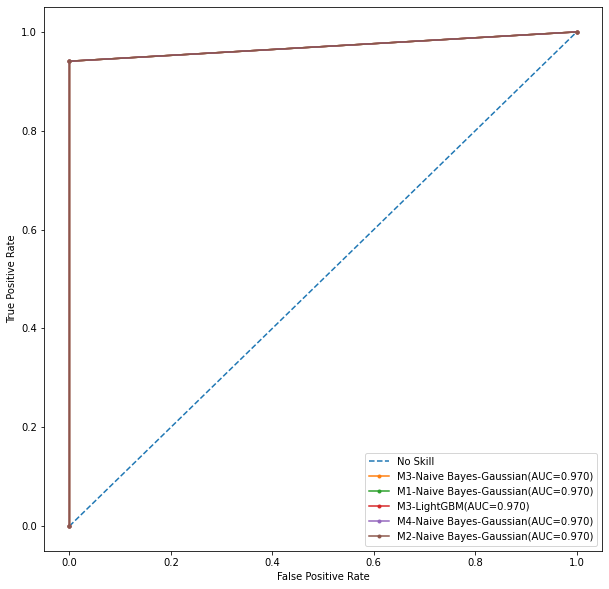

In [ ]:
# Top 5 AUC scores

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m1_naive_gaussian)
m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m4_naive_gaussian)
m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m2_naive_gaussian)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3-Naive Bayes-Gaussian(AUC=0.970)')
pyplot.plot(m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, marker='.', label='M1-Naive Bayes-Gaussian(AUC=0.970)')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3-LightGBM(AUC=0.970)')
pyplot.plot(m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, marker='.', label='M4-Naive Bayes-Gaussian(AUC=0.970)')
pyplot.plot(m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, marker='.', label='M2-Naive Bayes-Gaussian(AUC=0.970)')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.rcParams['figure.figsize'] = 10,10
pyplot.show()

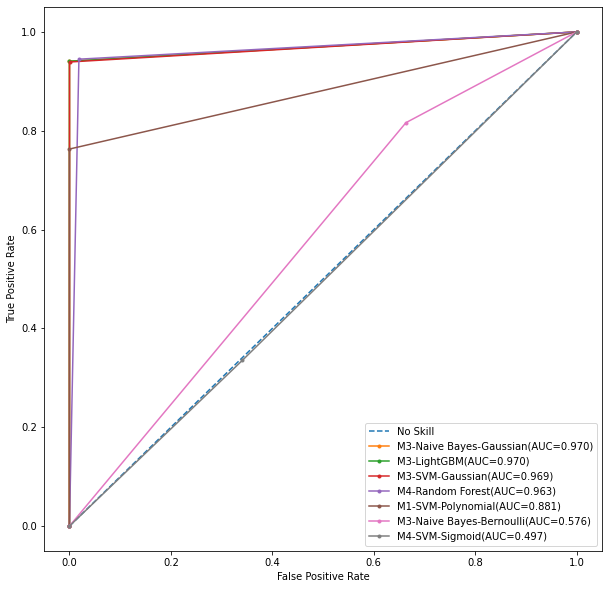

In [ ]:
# Top 5 Classifiers

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_svm_gaussian)
m4_rf_fpr, m4_rf_tpr, _ = roc_curve(y_test, y_pred_m4_rf)
m1_svm_polynomial_fpr, m1_svm_polynomial_tpr, _ = roc_curve(y_test, y_pred_m1_svm_polynomial)
m3_naive_bernoulli_fpr, m3_naive_bernoulli_tpr, _ = roc_curve(y_test, y_pred_m3_naive_bernoulli)
m4_svm_sigmoid_fpr, m4_svm_sigmoid_tpr, _ = roc_curve(y_test, y_pred_m4_svm_sigmoid)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3-Naive Bayes-Gaussian(AUC=0.970)')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3-LightGBM(AUC=0.970)')
pyplot.plot(m3_svm_gaussian_fpr, m3_svm_gaussian_tpr, marker='.', label='M3-SVM-Gaussian(AUC=0.969)')
pyplot.plot(m4_rf_fpr, m4_rf_tpr, marker='.', label='M4-Random Forest(AUC=0.963)')
pyplot.plot(m1_svm_polynomial_fpr, m1_svm_polynomial_tpr, marker='.', label='M1-SVM-Polynomial(AUC=0.881)')
pyplot.plot(m3_naive_bernoulli_fpr, m3_naive_bernoulli_tpr, marker='.', label='M3-Naive Bayes-Bernoulli(AUC=0.576)')
pyplot.plot(m4_svm_sigmoid_fpr, m4_svm_sigmoid_tpr, marker='.', label='M4-SVM-Sigmoid(AUC=0.497)')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot

pyplot.rcParams['figure.figsize'] = 10,10

pyplot.show()

In [ ]:
outfile = 'result2_off.csv'
data.to_csv(outfile)